## Classification Setting, Bayes Classifier and k-NN

In the classification setting, we seek to estimate a function $f$ on the basis of observations $\{(x_1, y_1) ... (x_n, y_n)\}$, where $y_1 ... y_n$ are _qualitative_. One could imagine using linear regression to solve problems of classification by encoding the qualitative responses as quantitative responses. For example, in a 3-class classification problem, we could have $Y = 1, 2, 3$ and use least squares to fit the model. But by encoding this way, we inherently produce a model where the difference between classes 1 and 2 is assumed to be equal to the difference between classes 2 and 3. This is so because in the response space, the quantitative variables are equally spaced. We also see predicted variables above and below the range, which are harder to interpret.

The error rate for a classification problem can be simply defined as the proportion of mistakes on applying our function $f$:

$$\frac{1}{n} \sum_{i=1}^{n} I(y_i \ne \hat y_i)$$

where $I()$ is an indicator function. For test observations $(x_0, y_0)$, the test error rate is simply:

$$Ave(I(y_0 \ne \hat y_0))$$

A simple classifier that minimizes the test error rate on average is the ___Bayes Classifier___. It simply assigns each observation to the most likely class, given its predictor values. The Bayes Classifier basically assigns a test observation $x_0$ to the class $j$ for which $Pr(Y=j \mid X=x_0)$ is largest. For a binary classification problem, where class takes value $1$ or $2$, the Bayes classifier predicts class $1$ if $Pr(Y=1 \mid X=x_0) > 0.5$ and class $2$ otherwise. However, in real scenarios we rarely ever know the conditional distribution of $Y$ given $X$ and we cannot compute the Bayes classifier. Most approaches typically attempt to estimate the conditonal distribution, and then classify the test point to the class with highest estimated probability.

### k-Nearest Neighbors

Given a positive integer $k$ and a test observation $x_0$, the kNN classifier finds $k$ points in the training data that are closest to $x_0$, represented by $\mathcal N_0$, and estimates the conditional probability for class $j$ as the fraction of points in $\mathcal N_0$ belonging to class $j$.

$$Pr(Y = j \mid X = x_0) = \frac{1}{k}\sum_{i \in \mathcal N_0} I(y_i = j)$$

Closeness in points is a metric; usually the Euclidean distance. The choice of $k$ has a big effect on the classifier obtained. Let's consider the _iris_ dataset as an example below. We use 2 features _sepal length_ and _sepal width_ to predict the class using k-NN.

In [1]:
import numpy

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

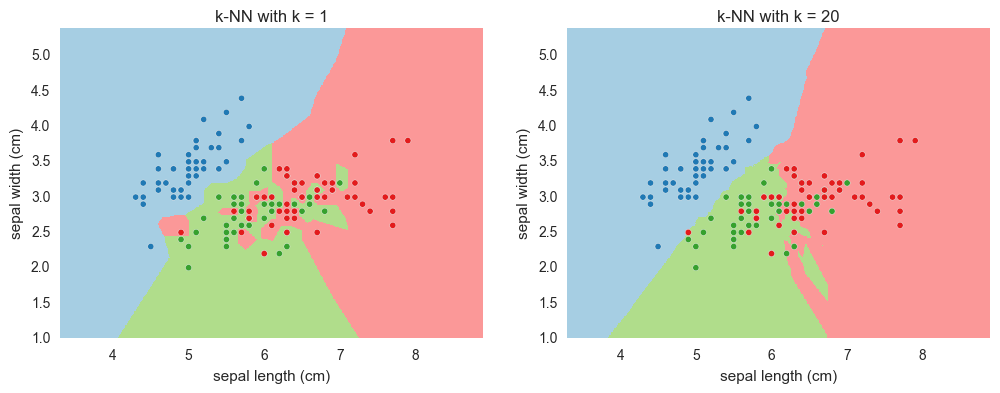

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

xx, yy = numpy.meshgrid(numpy.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01),
                        numpy.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01))
X_grid = numpy.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

n_neighbors = [1, 20]
for i in range(2):
    clf = KNeighborsClassifier(n_neighbors[i])
    clf.fit(X, y)
    Z_grid = clf.predict(X_grid).reshape(xx.shape)
    ax = axes[i]
    colors = sns.color_palette('Paired', 6)
    ax.pcolormesh(xx, yy, Z_grid, cmap=ListedColormap(colors[::2]))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[1::2]))
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title('k-NN with k = '+str(n_neighbors[i]))

For $k = 1$, the classifier has low bias but high variance. The decision boundary is overly flexible and picks up patterns resembling islands and aren't very smooth. As $k$ increases, the method becomes less flexible, the bias of the classifer increases as we average over more points in the neighborhood, but we do get a smoother, less variable, but increasingly linear decision boundary.